In [1]:
import random
import numpy as np
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import math
import scipy.stats as stats
from scipy.stats import norm
from datetime import datetime, timedelta
import statsmodels.api as sm
%matplotlib inline

In [2]:
tickers=['AAPL','PFE','CAT','WMT','GS','DIS','GOOG','DAL','DPZ','XOM','^GSPC']

In [3]:
df=yf.download(tickers,start='2014-12-02',end='2022-10-31')['Close'].pct_change()

[*********************100%***********************]  11 of 11 completed


In [4]:
df=df.dropna()
df

,AAPL,CAT,DAL,DIS,DPZ,GOOG,GS,PFE,WMT,XOM,^GSPC
Date,,,,,,,,,,,
2014-12-02,-0.003824,0.005152,-0.020824,0.008306,0.009448,-0.000094,0.010574,0.009917,0.002088,0.019924,0.006384
2014-12-03,0.011341,0.006733,0.001791,-0.003852,0.006415,-0.004553,0.003996,0.005702,-0.016898,0.008069,0.003765
2014-12-04,-0.003795,-0.005091,0.037318,0.001289,0.002403,0.011274,0.005237,-0.002520,-0.002119,-0.006108,-0.001162
2014-12-05,-0.004243,-0.008929,0.018527,0.005685,-0.010841,-0.022427,0.018234,0.010104,-0.007551,-0.005828,0.001665
2014-12-08,-0.022609,-0.035736,0.001269,0.000427,0.005375,0.003275,0.005986,-0.000625,0.001308,-0.022596,-0.007257
...,...,...,...,...,...,...,...,...,...,...,...
2022-10-24,0.014803,0.005678,0.021179,-0.003136,0.004976,0.014683,0.011074,0.013126,0.019079,0.006990,0.011882
2022-10-25,0.019338,0.018505,0.018936,0.025954,0.017700,0.019035,0.011256,0.001098,0.004734,-0.006754,0.016267
2022-10-26,-0.019627,0.010881,0.000000,0.002587,-0.020859,-0.096350,0.009898,0.010309,0.007639,0.011900,-0.007388


In [5]:
metrix=pd.DataFrame(columns=[tickers[:-1]],index=['Beta','Expected return','Rank(dcsc)','Rank(asc)'])
metrix

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
Beta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Expected return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank(dcsc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank(asc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
SP500_returns=10.61#np.prod(1+df['^GSPC'])**(1/10)-1
Risk_free_rate=4.05
SP500_returns

10.61

In [7]:
x=sm.add_constant(df['^GSPC'])
for i in tickers[:-1]:
    model=sm.OLS(df[i].dropna(),x)
    results=model.fit()
    metrix.loc['Beta',i]=results.params[1]

In [8]:
metrix

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
Beta,1.199851,0.65096,1.059389,0.531269,1.208511,0.983729,1.111002,1.258513,0.603521,0.924508
Expected return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank(dcsc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank(asc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
for i in tickers[:-1]:
    e=Risk_free_rate+((metrix.loc['Beta',i].values*SP500_returns)-Risk_free_rate)
    print(e)
    metrix.loc['Expected return',i]=e/100

[12.730416340783577]
[6.906689924586179]
[11.240114869346128]
[5.63676094944447]
[12.82230036328398]
[10.437369260577725]
[11.787732371136668]
[13.35281772997697]
[6.403356258833745]
[9.809030644680687]


In [10]:
metrix

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
Beta,1.199851,0.65096,1.059389,0.531269,1.208511,0.983729,1.111002,1.258513,0.603521,0.924508
Expected return,0.127304,0.069067,0.112401,0.056368,0.128223,0.104374,0.117877,0.133528,0.064034,0.09809
Rank(dcsc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rank(asc),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(tickers[:-1])

10

In [12]:
metrix.loc['Expected return'].values

array([0.12730416340783576, 0.06906689924586179, 0.11240114869346128,
       0.056367609494444706, 0.12822300363283978, 0.10437369260577725,
       0.11787732371136668, 0.1335281772997697, 0.06403356258833745,
       0.09809030644680687], dtype=object)

In [13]:
metrix.loc['Rank(dcsc)']=pd.qcut(metrix.loc['Expected return'].values,10,labels=[i for i in range(10,0,-1)])
metrix.loc['Rank(asc)']=pd.qcut(metrix.loc['Expected return'].values,10,labels=[i for i in range(1,11)])

In [14]:
num_of_stocks=10
min_allocation=0.05
max_allocation=0.12
top=(1-num_of_stocks*min_allocation) // (max_allocation-min_allocation)
bottom=num_of_stocks-top-1
remaining=1-max_allocation*top-min_allocation*bottom
top,bottom,remaining

(7.0, 2.0, 0.060000000000000026)

In [15]:
portfolio=pd.DataFrame(columns=[tickers[:-1]],index=['Max return','Min return'])
portfolio

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
Max return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Min return,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
metrix.loc['Rank(dcsc)','AAPL'][0]

3

In [17]:
for i in tickers[:-1]:
    if metrix.loc['Rank(asc)',i][0]<=top:
        portfolio.loc['Min return',i]=max_allocation
    elif metrix.loc['Rank(asc)',i][0]>=top+2:
        portfolio.loc['Min return',i]=min_allocation
    else:
        portfolio.loc['Min return',i]=remaining

In [18]:
for i in tickers[:-1]:
    if metrix.loc['Rank(dcsc)',i][0]<=top:
        portfolio.loc['Max return',i]=max_allocation
    elif metrix.loc['Rank(dcsc)',i][0]>=top+2:
        portfolio.loc['Max return',i]=min_allocation
    else:
        portfolio.loc['Max return',i]=remaining

In [19]:
portfolio

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
Max return,0.12,0.06,0.12,0.05,0.12,0.12,0.12,0.12,0.05,0.12
Min return,0.06,0.12,0.12,0.12,0.05,0.12,0.12,0.05,0.12,0.12


In [20]:
cov=df[tickers[:-1]].cov()*252
cov

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
AAPL,0.088028,0.022951,0.037160,0.021966,0.044416,0.036482,0.052051,0.043810,0.027511,0.029152
PFE,0.022951,0.054104,0.023556,0.015679,0.024777,0.018780,0.021797,0.024116,0.011671,0.020902
CAT,0.037160,0.023556,0.092492,0.016791,0.056515,0.039189,0.034640,0.055958,0.014262,0.052656
WMT,0.021966,0.015679,0.016791,0.048458,0.017746,0.015838,0.017980,0.011692,0.014524,0.013819
GS,0.044416,0.024777,0.056515,0.017746,0.088893,0.047670,0.041643,0.069938,0.020968,0.048360
DIS,0.036482,0.018780,0.039189,0.015838,0.047670,0.075525,0.035993,0.062222,0.019375,0.036831
GOOG,0.052051,0.021797,0.034640,0.017980,0.041643,0.035993,0.078165,0.043027,0.025870,0.028312
DAL,0.043810,0.024116,0.055958,0.011692,0.069938,0.062222,0.043027,0.172995,0.016101,0.050761
DPZ,0.027511,0.011671,0.014262,0.014524,0.020968,0.019375,0.025870,0.016101,0.090128,0.009390
XOM,0.029152,0.020902,0.052656,0.013819,0.048360,0.036831,0.028312,0.050761,0.009390,0.085036


In [21]:
(portfolio.loc['Max return'].values.T.dot((df[tickers[:-1]].cov()*252).dot(portfolio.loc['Max return'].values)))**(1/2)

0.20761598986924018

In [22]:
(portfolio.loc['Min return'].values.T.dot((df[tickers[:-1]].cov()*252).dot(portfolio.loc['Min return'].values)))**(1/2)

0.18159441561233897

In [23]:
(portfolio.loc['Max return'].values*metrix.loc['Expected return',tickers[:-1]].values).sum()

0.10877981045463368

In [24]:
(portfolio.loc['Min return'].values*metrix.loc['Expected return',tickers[:-1]].values).sum()

0.09539107398542736

In [25]:
port_per=pd.DataFrame(columns=['Sum','AAPL', 'PFE', 'CAT', 'WMT', 'GS', 'DIS', 'GOOG', 'DAL', 'DPZ', 'XOM','Risk','Return','Return(constrain)'],index=[i for i in range(10)])
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
port_per.loc[0,'Return(constrain)']=(portfolio.loc['Max return'].values*metrix.loc['Expected return',tickers[:-1]].values).sum()
port_per.loc[9,'Return(constrain)']=(portfolio.loc['Min return'].values*metrix.loc['Expected return',tickers[:-1]].values).sum()
port_per.loc[0,'Risk']=(portfolio.loc['Max return'].values.T.dot((df[tickers[:-1]].cov()*252).dot(portfolio.loc['Max return'].values)))**(1/2)
port_per.loc[9,'Risk']=(portfolio.loc['Min return'].values.T.dot((df[tickers[:-1]].cov()*252).dot(portfolio.loc['Min return'].values)))**(1/2)

In [27]:
range_=0.0397
step=0.0026

In [28]:
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207616,NaN,0.10878
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181594,NaN,0.095391


In [29]:
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.207616,NaN,0.10878
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.181594,NaN,0.095391


In [30]:
0.128113-0.0072

0.120913

In [31]:
port_per.loc[0,tickers[:-1]]=portfolio.loc['Max return',tickers[:-1]].values
port_per.loc[9,tickers[:-1]]=portfolio.loc['Min return',tickers[:-1]].values

In [32]:
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,0.12,0.06,0.12,0.05,0.12,0.12,0.12,0.12,0.05,0.12,0.207616,NaN,0.10878
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.06,0.12,0.12,0.12,0.05,0.12,0.12,0.05,0.12,0.12,0.181594,NaN,0.095391


In [33]:
for i in range(1,len(tickers[:-1])):
    port_per.loc[i,'Return(constrain)']=port_per.loc[i-1,'Return(constrain)']-step
    port_per.loc[i,'Sum']=port_per.loc[i,tickers[:-1]].sum()

In [34]:
port_per.loc[0,tickers[:-1]].sum()

1.0

In [35]:
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,0.12,0.06,0.12,0.05,0.12,0.12,0.12,0.12,0.05,0.12,0.207616,NaN,0.10878
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10618
2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10358
3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.10098
4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09838
5,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09578
6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09318
7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09058
8,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.08798
9,1.0,0.06,0.12,0.12,0.12,0.05,0.12,0.12,0.05,0.12,0.12,0.181594,NaN,0.08538


In [36]:
risk_1=[]
ret_1=[]
for x in range(30000):
    p_weights=np.random.random(len(tickers[:-1]))
    p_weights/=np.sum(p_weights)
    returns=p_weights.dot(metrix.loc['Expected return',tickers[:-1]].values).sum()
    risk=(p_weights.T.dot((df[tickers[:-1]].cov()*252).dot(p_weights)))**(1/2)
    risk_1.append(risk)
    ret_1.append(returns)

risk = np.array(risk_1)
ret= np.array(ret_1)

    
risk,ret

(array([0.21611646, 0.18697505, 0.21675445, ..., 0.19901057, 0.19702439,
        0.20225649]),
 array([0.11030681, 0.09810161, 0.11245176, ..., 0.10312876, 0.10318637,
        0.10257431]))

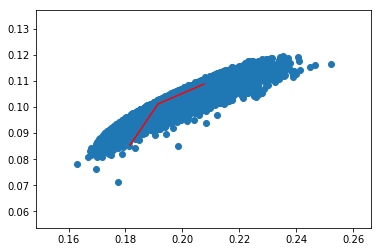

In [37]:
plt.scatter(risk,ret)
plt.plot(np.array([port_per.loc[0,'Risk'],0.191403,port_per.loc[9,'Risk']]),np.array([(portfolio.loc['Max return'].values*metrix.loc['Expected return',tickers[:-1]].values).sum(),0.101127,port_per.loc[9,'Return(constrain)']]),color='r')

In [38]:
for i in range(1,9):
    port_per.loc[i,tickers[:-1]]=[1/len(tickers[:-1]) for i in range(0,10)]
    port_per.loc[i,'Return']=port_per.loc[i,tickers[:-1]].dot(metrix.loc['Expected return',tickers[:-1]].values).sum()
    port_per.loc[i,'Risk']=(port_per.loc[i,tickers[:-1]].T.dot((df[tickers[:-1]].cov()*252).dot(port_per.loc[i,tickers[:-1]])))**(1/2)

In [39]:
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,0.12,0.06,0.12,0.05,0.12,0.12,0.12,0.12,0.05,0.12,0.207616,NaN,0.10878
1,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.10618
2,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.10358
3,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.10098
4,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.09838
5,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.09578
6,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.09318
7,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.09058
8,0,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.191403,0.101127,0.08798
9,1.0,0.06,0.12,0.12,0.12,0.05,0.12,0.12,0.05,0.12,0.12,0.181594,NaN,0.08538


In [40]:
inverse=pd.DataFrame(columns=[tickers[:-1]],index=[tickers[:-1]])
inverse

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
AAPL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PFE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CAT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WMT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DIS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GOOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPZ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XOM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
inverse.loc['AAPL']=np.linalg.inv(df[tickers[:-1]].cov()*252)[0]
inverse.loc['PFE']=np.linalg.inv(df[tickers[:-1]].cov()*252)[1]
inverse.loc['CAT']=np.linalg.inv(df[tickers[:-1]].cov()*252)[2]
inverse.loc['WMT']=np.linalg.inv(df[tickers[:-1]].cov()*252)[3]
inverse.loc['GS']=np.linalg.inv(df[tickers[:-1]].cov()*252)[4]
inverse.loc['DIS']=np.linalg.inv(df[tickers[:-1]].cov()*252)[5]
inverse.loc['GOOG']=np.linalg.inv(df[tickers[:-1]].cov()*252)[6]
inverse.loc['DAL']=np.linalg.inv(df[tickers[:-1]].cov()*252)[7]
inverse.loc['DPZ']=np.linalg.inv(df[tickers[:-1]].cov()*252)[8]
inverse.loc['XOM']=np.linalg.inv(df[tickers[:-1]].cov()*252)[9]
inverse

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
AAPL,21.611387,-1.429325,-1.264605,-3.116181,-3.00852,-1.647412,-9.648163,-0.357244,-1.851847,0.286444
PFE,-1.429325,23.557516,-1.550487,-4.319198,-1.649598,-0.254776,-2.007478,-0.341027,-0.422926,-1.67125
CAT,-1.264605,-1.550487,21.418814,-1.017239,-6.890843,-1.001796,-0.885044,-0.893377,0.337346,-7.139686
WMT,-3.116181,-4.319198,-1.017239,25.328406,-0.689861,-1.840516,-0.909987,1.509639,-1.803727,-0.565775
GS,-3.00852,-1.649598,-6.890843,-0.689861,27.176492,-4.675537,-2.516161,-4.069986,-1.094228,-4.22632
DIS,-1.647412,-0.254776,-1.001796,-1.840516,-4.675537,24.681436,-2.994482,-4.428094,-1.295237,-2.70097
GOOG,-9.648163,-2.007478,-0.885044,-0.909987,-2.516161,-2.994482,24.207066,-0.586001,-2.096507,-0.253284
DAL,-0.357244,-0.341027,-0.893377,1.509639,-4.069986,-4.428094,-0.586001,9.711253,0.477972,-0.907941
DPZ,-1.851847,-0.422926,0.337346,-1.803727,-1.094228,-1.295237,-2.096507,0.477972,12.89848,0.994761
XOM,0.286444,-1.67125,-7.139686,-0.565775,-4.22632,-2.70097,-0.253284,-0.907941,0.994761,20.675222


In [42]:
e_vec=pd.DataFrame(columns=[tickers[:-1]],index=[['e-vector','r-vector','h-vector','g-vector']])
e_vec.loc['e-vector']=[1 for i in range(10)]
e_vec.loc['r-vector']=metrix.loc['Expected return'].values
e_vec.loc['h-vector']=np.dot(e_vec.loc['e-vector'],inverse)
e_vec.loc['g-vector']=np.dot(e_vec.loc['r-vector'],inverse)
e_vec

,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM
e-vector,1,1,1,1,1,1,1,1,1,1
r-vector,0.127304,0.069067,0.112401,0.056368,0.128223,0.104374,0.117877,0.133528,0.064034,0.09809
h-vector,-0.425465,9.911451,1.113083,12.575561,-1.644562,3.842616,2.309959,0.115193,6.144088,4.4912
g-vector,0.501513,0.31605,0.191607,0.261105,0.36161,0.240779,0.463275,0.100799,0.135999,0.20346


In [43]:
alpha=np.dot(e_vec.loc['e-vector'],e_vec.loc['h-vector'].T)[0][0]
beta=np.dot(e_vec.loc['e-vector'],e_vec.loc['g-vector'].T)[0][0]
gamma=np.dot(e_vec.loc['r-vector'],e_vec.loc['g-vector'].T)[0][0]
delta=alpha*gamma-beta**2
alpha,beta,gamma,delta

(38.43312479616217,
 2.7761975895308355,
 0.29016084039121537,
 3.4445147335980506)

In [44]:
for i in range(1,9):
    Targeted_return=port_per.loc[i,'Return(constrain)']
    Lambda=(gamma-beta*Targeted_return)/delta
    mu=(alpha*Targeted_return-beta)/delta
    port_per.loc[i,tickers[:-1]]=np.array((Lambda*e_vec.loc['h-vector']))+np.array(mu*e_vec.loc['g-vector'])
    port_per.loc[i,'Risk']=(port_per.loc[i,tickers[:-1]].values.T.dot((df[tickers[:-1]].cov()*252).dot(port_per.loc[i,tickers[:-1]].values)))**(1/2)

In [45]:
port_per['Return']=port_per['Return(constrain)']
port_per

,Sum,AAPL,PFE,CAT,WMT,GS,DIS,GOOG,DAL,DPZ,XOM,Risk,Return,Return(constrain)
0,NaN,0.12,0.06,0.12,0.05,0.12,0.12,0.12,0.12,0.05,0.12,0.207616,0.10878,0.10878
1,0,0.19052,0.106425,0.071081,0.082045,0.139165,0.086047,0.172372,0.038024,0.043278,0.071044,0.19717,0.10618,0.10618
2,0,0.17508,0.118026,0.067855,0.100823,0.125228,0.087115,0.163773,0.035341,0.052207,0.074553,0.192307,0.10358,0.10358
3,0,0.159639,0.129627,0.064629,0.1196,0.111291,0.088182,0.155174,0.032658,0.061137,0.078062,0.18772,0.10098,0.10098
4,0,0.144199,0.141228,0.061402,0.138378,0.097355,0.089249,0.146575,0.029975,0.070067,0.081571,0.18343,0.09838,0.09838
5,0,0.128758,0.15283,0.058176,0.157156,0.083418,0.090317,0.137976,0.027292,0.078997,0.08508,0.179457,0.09578,0.09578
6,0,0.113317,0.164431,0.05495,0.175934,0.069482,0.091384,0.129377,0.02461,0.087927,0.088589,0.175824,0.09318,0.09318
7,0,0.097877,0.176032,0.051724,0.194712,0.055545,0.092451,0.120778,0.021927,0.096857,0.092098,0.172553,0.09058,0.09058
8,0,0.082436,0.187633,0.048498,0.21349,0.041608,0.093518,0.112178,0.019244,0.105786,0.095607,0.169663,0.08798,0.08798
9,1.0,0.06,0.12,0.12,0.12,0.05,0.12,0.12,0.05,0.12,0.12,0.181594,0.08538,0.08538


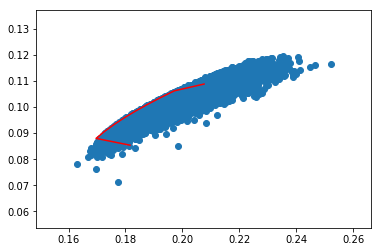

In [46]:
plt.scatter(risk,ret)
plt.plot(port_per['Risk'].values,port_per['Return'].values,color='r')